<a href="https://colab.research.google.com/github/hfelizzola/Curso-Estadistica/blob/main/Estadisticas_Descriptivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadísticas descriptivas

En este notebook, realizaremos un análisis estadístico de lanzamientos de películas utilizando datos recopilados sobre diferentes películas. El conjunto de datos contiene información relevante, como el título de la película, presupuesto, ingresos locales y mundiales, distribuidor, género, clasificación, y la fecha de lanzamiento.

Antes de comenza cualquier tarea de análisis en google colab dede realizar los siguientes 4 pasos:

1. Cargar librerias
2. Configurar la conexión con Google Drive
3. Configurar el directorio de trabajo
4. Verificar que el archivo de datos que va a trabar se encuentre en la carpeta del directorio de trabajo

## Carga de Librerías

Para comenzar, cargaremos las librerías necesarias para realizar nuestro análisis. Utilizaremos pandas para la manipulación de datos, numpy para operaciones matemáticas, matplotlib y seaborn para la visualización de gráficos, y os para la gestión de directorios.

In [1]:
# Paso 1. Importa librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Conexión con Google Drive
A continuación, configuraremos la conexión con una carpeta en Google Drive llamada "Estadistica". Esto nos permitirá almacenar y cargar los datos en esta ubicación para facilitar el acceso a ellos durante el desarrollo del análisis.

> Recuerda que primero debes crear la carpeta *Estadístico* dentro del directorio *Colab Notebooks*.

In [2]:
# Paso 2. Configurar la conexión con google drive
from google.colab import drive

# Montar Google Drive
drive.mount('/gdrive')

# Paso 3. Configurar el directorio de trabajo
# Definir la ruta de la carpeta "estadistica" en Google Drive
carpeta_drive = '/gdrive/MyDrive/Colab Notebooks/Estadistica'

# Verificar que la conexión se ha establecido correctamente
if os.path.exists(carpeta_drive):
    os.chdir('/gdrive/MyDrive/Colab Notebooks/Estadistica')
    print('Conexión con Google Drive exitosa.')
else:
    print('Error al conectar con Google Drive. Verifica la ruta de la carpeta.')

Mounted at /gdrive
Conexión con Google Drive exitosa.


In [3]:
# Paso 4. Verificar la lista de archivos en el directorio de trabajo
!ls

 cargos-servicios-salud.xlsx	        estatura_peso_clase.xlsx
'Copia de Intervalos_Confianza.ipynb'   movies.xlsx
 datos_clase.gsheet		        Regresion_Lineal.ipynb
 datos_regresion.xlsx		        Untitled0.ipynb
 Ejercicio-Practica-Tercer-Corte        W92S73-XLS-ENG.xlsx
 Estadisticas_Descriptivas.ipynb


## Análisis Estadístico de Lanzamientos de Películas

La base de datos utilizada para el análisis estadístico de lanzamientos de películas contiene información detallada sobre diversas películas. A continuación, describiremos cada una de las columnas presentes en el conjunto de datos:

1. **Título de la película (movie):** Esta columna almacena el nombre o título de cada película registrada en la base de datos.

2. **Presupuesto (budget):** Aquí se registran los valores correspondientes al presupuesto asignado para la producción de cada película en la moneda local del país.

3. **Ingresos locales y mundiales (box_dom y box_world):** Estas columnas almacenan los ingresos generados por cada película en dos ámbitos distintos: los ingresos locales, referentes a la taquilla en el país de origen, y los ingresos mundiales, que incluyen la recaudación global en todos los países donde se proyectó la película.

4. **Distribuidor (distributor):** Esta columna indica el nombre o identificador de la compañía distribuidora encargada de llevar la película a los distintos mercados y cines.

5. **Género (genre):** Aquí se registra la clasificación del género cinematográfico al que pertenece cada película, como acción, comedia, drama, ciencia ficción, entre otros.

6. **Clasificación (mppa):** En esta columna se encuentra la clasificación asignada por la Motion Picture Association of America (MPAA) o entidad similar, que indica la adecuación de la película para distintas audiencias en función de la edad y contenido.

7. **Mes, día y año del lanzamiento (month, day, year):** Estas columnas almacenan la fecha completa de lanzamiento de cada película, con el mes, día y año en que fue estrenada en los cines.

In [4]:
# Cargar datos de las peliculas
movies = pd.read_excel("movies.xlsx")

# Mostrar las primeras 10 filas
movies.head(10)

,movie,budget,box_dom,box_world,distributor,genre,mpaa,month,day,year
0,The Legend of Hercules,70.000,18.848538,61.402445,Lionsgate,Adventure,PG-13,1,10,2014
1,Gangster Squad,60.000,46.000903,104.100903,Warner Bros.,Drama,R,1,11,2013
2,Quartet,11.000,18.388357,56.178935,Weinstein Co.,Comedy,PG-13,1,11,2013
3,A Haunted House,2.500,40.041683,59.922558,Open Road,Comedy,R,1,11,2013
4,Contraband,25.000,66.528000,98.406855,Universal,Action,R,1,13,2012
5,Joyful Noise,27.500,30.932113,31.157914,Warner Bros.,Musical,PG-13,1,13,2012
6,Newlyweds,0.009,0.004584,0.004584,TriBeca Films,Comedy,R,1,13,2012
7,The Divide,3.000,0.018000,0.138274,Anchor Bay Entertainment,Thriller/Suspense,R,1,13,2012
8,The Dilemma,70.000,48.475290,70.546865,Universal,Comedy,PG-13,1,14,2011
9,Down for Life,3.800,0.041914,0.041914,B.D. Fox Independent,Drama,R,1,14,2011


In [5]:
# Información general de la base de datos
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie        873 non-null    object 
 1   budget       873 non-null    float64
 2   box_dom      873 non-null    float64
 3   box_world    873 non-null    float64
 4   distributor  873 non-null    object 
 5   genre        873 non-null    object 
 6   mpaa         873 non-null    object 
 7   month        873 non-null    int64  
 8   day          873 non-null    int64  
 9   year         873 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 68.3+ KB


## Tablas de frecuencia y gráficos

### Genero

¿Cuál es la distribución de género de las películas en nuestra base de datos y cómo podemos representar visualmente esta información para entender mejor las preferencias de los espectadores?

In [6]:
# Tabla de Frecuencia
tab_frec_genero = movies.groupby('genre').size().sort_values(ascending=False).reset_index()
tab_frec_genero.columns = ['Genero','Frecuencia']
tab_frec_genero

,Genero,Frecuencia
0,Drama,239
1,Comedy,163
2,Thriller/Suspense,120
3,Action,105
4,Adventure,96
5,Horror,54
6,Romantic Comedy,38
7,Documentary,22
8,Black Comedy,16
9,Musical,9


El anterior código realiza el cálculo de una tabla de frecuencias para la variable 'genre' (género) en un DataFrame llamado 'movies'. Vamos a explicar paso a paso lo que hace cada línea:

1. `movies.groupby('genre').size()`: Esta parte del código agrupa el DataFrame 'movies' por la columna 'genre' y luego calcula el tamaño de cada grupo. En otras palabras, cuenta cuántas veces aparece cada valor único en la columna 'genre', lo que equivale a contar la frecuencia de cada género en la base de datos.

2. `.sort_values(ascending=False)`: Después de calcular las frecuencias, esta parte del código ordena los resultados en orden descendente (de mayor a menor) según la frecuencia. Esto asegura que los géneros más frecuentes aparezcan primero en la tabla.

3. `.reset_index()`: Esta parte del código reinicia los índices del DataFrame resultante para que la columna 'genre' se convierta en una columna normal y no sea utilizada como índice.

In [7]:
# Calcular el porcentaje
tab_frec_genero['Porcentaje'] = tab_frec_genero['Frecuencia']/(tab_frec_genero['Frecuencia'].sum())*100
tab_frec_genero

,Genero,Frecuencia,Porcentaje
0,Drama,239,27.376861
1,Comedy,163,18.671249
2,Thriller/Suspense,120,13.745704
3,Action,105,12.027491
4,Adventure,96,10.996564
5,Horror,54,6.185567
6,Romantic Comedy,38,4.352806
7,Documentary,22,2.520046
8,Black Comedy,16,1.832761
9,Musical,9,1.030928


In [8]:
# Calcular el porcentaje acumulado
tab_frec_genero['Porcentaje Acumulado'] = tab_frec_genero['Porcentaje'].cumsum()
tab_frec_genero

,Genero,Frecuencia,Porcentaje,Porcentaje Acumulado
0,Drama,239,27.376861,27.376861
1,Comedy,163,18.671249,46.048110
2,Thriller/Suspense,120,13.745704,59.793814
3,Action,105,12.027491,71.821306
4,Adventure,96,10.996564,82.817869
5,Horror,54,6.185567,89.003436
6,Romantic Comedy,38,4.352806,93.356243
7,Documentary,22,2.520046,95.876289
8,Black Comedy,16,1.832761,97.709049
9,Musical,9,1.030928,98.739977


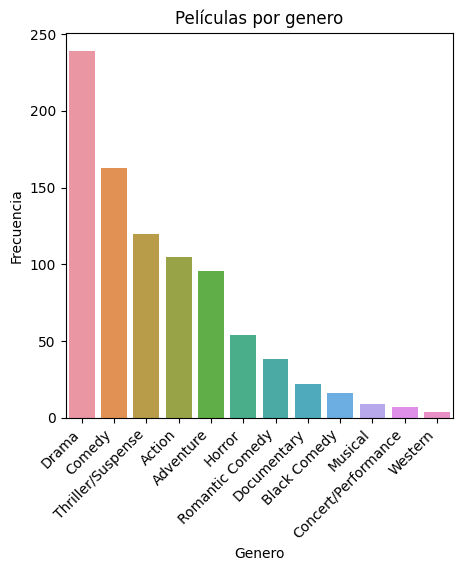

In [9]:
# Crear el gráfico de barras
plt.figure(figsize=(5, 5))  # Ajustar el tamaño del gráfico
sns.barplot(data=tab_frec_genero, x='Genero', y='Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres de los géneros
plt.title('Películas por genero')

# Mostrar el gráfico
plt.show()

> Cuando un número de categorías considerables (normalmente mas de 8 o 10) se recomienda utilizar el gráfico de barras en sentido horizontal.


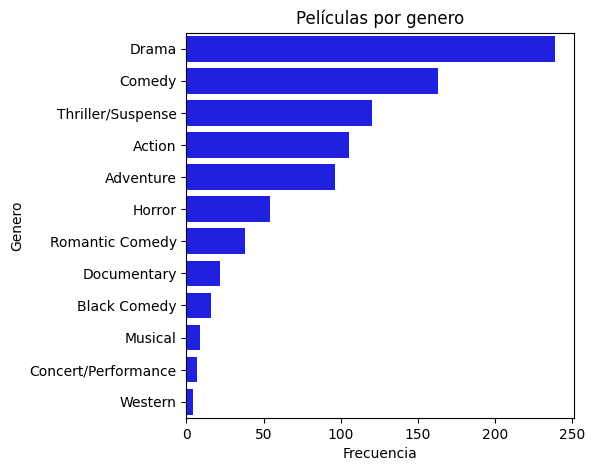

In [10]:
# Crear el gráfico de barras horizontal
plt.figure(figsize=(5, 5))  # Ajustar el tamaño del gráfico
sns.barplot(data=tab_frec_genero, x='Frecuencia', y='Genero', color='blue')
plt.title('Películas por genero')

# Mostrar el gráfico
plt.show()

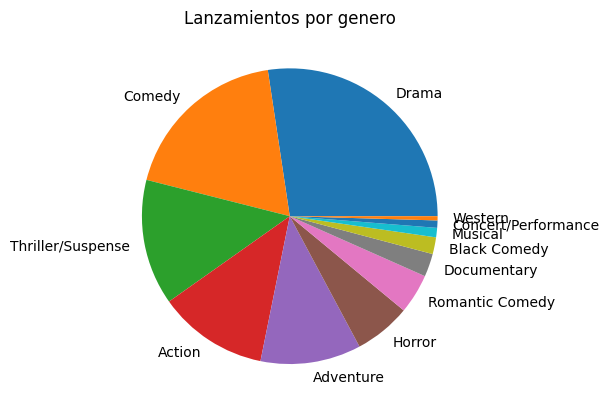

In [11]:
# Gráfico de torta
plt.pie(x=tab_frec_genero['Frecuencia'], labels=tab_frec_genero['Genero'])
plt.title('Lanzamientos por genero')
plt.show()

### Distributor

Presente la tabla de frecuencia y el gráfico de barra para la variable distribuidor.

In [13]:
# Tabla de Frecuencia


In [14]:
# Gráfico de Barra


Cuando se tiene una numero considerable de categorías, se recomienda gráficar los mas importantes según su frecuencia o porcentaje utilizando el principio de pareto u otro criterio.

In [12]:
# Verificar cuantos distribuidores tenemos en la base de datos
movies['distributor'].nunique()

101

La función `nunique()` cuenta el número de valores únicos en una variable.

Observe que algunos procedemientos de análisis de datos se vuelven rutinarios, ya que, los códigos se repiten. Esto nos da la oportunidad de covertir esta rutina en una función y con esto ahorra tiempo y lineas de código.

La estructura de una función es:



```python
def nombre_función(argumentos):
    
    comandos...

    return objeto
```



In [13]:
# Función para generar una tabla de frecuencia
def tabla_frecuencia(df, var_categorica, ordenado=True):
  tab_frec_genero = movies.groupby(var_categorica).size().reset_index()
  tab_frec_genero.columns = [var_categorica,'Frecuencia']
  if ordenado:
    tab_frec_genero = tab_frec_genero.sort_values(ascending=False, by='Frecuencia')

  tab_frec_genero['Porcentaje'] = tab_frec_genero['Frecuencia']/(tab_frec_genero['Frecuencia'].sum())*100
  tab_frec_genero['Porcentaje Acumulado'] = tab_frec_genero['Porcentaje'].cumsum()
  return tab_frec_genero

In [14]:
# Utilizar la función con la variable distributor
tabla_frecuencia(df=movies, var_categorica='distributor', ordenado=False)

,distributor,Frecuencia,Porcentaje,Porcentaje Acumulado
0,20th Century Fox,73,8.361970,8.361970
1,A24,8,0.916380,9.278351
2,AFFRM,1,0.114548,9.392898
3,ARC Entertainment,1,0.114548,9.507446
4,Alchemy,6,0.687285,10.194731
...,...,...,...,...
96,Weinstein Co.,37,4.238259,99.312715
97,Weinstein/Dimension,2,0.229095,99.541810
98,Well Go USA,1,0.114548,99.656357
99,Wrekin Hill Entertainment,2,0.229095,99.885452


### Año

Ahora utilice la función de tabla de frecuencia para generar la tabla de frecuencia para el año de lanzamiento y el gráfico de barra.

In [ ]:
# Tabla de frecuencia


In [ ]:
# Gráfico de barra


## Distribución de frecuencia - Histograma

### Budget

Vamos a utilizar una serie de funciones de python para generar una distribución de frecuencia para una variable numérica. Vamos a utilizar la variable presupuesto (budget) para ilustrar el procedimiento.

In [15]:
# 2. Calcular el número de clases
n_datos = len(movies['budget']) # Calcular el número de datos en la columna budget
num_clases_presupuesto = int(1 + 3.322*np.log10(n_datos))
num_clases_presupuesto

10

In [16]:
# Se crea una nueva variable que discretiza la variable prespuesto
movies['rango_budget'] = pd.cut(x=movies['budget'], bins=num_clases_presupuesto)
movies['rango_budget']

0      (60.003, 90.003]
1      (30.004, 60.003]
2      (-0.296, 30.004]
3      (-0.296, 30.004]
4      (-0.296, 30.004]
             ...       
868    (-0.296, 30.004]
869    (-0.296, 30.004]
870    (-0.296, 30.004]
871    (-0.296, 30.004]
872    (30.004, 60.003]
Name: rango_budget, Length: 873, dtype: category
Categories (10, interval[float64, right]): [(-0.296, 30.004] < (30.004, 60.003] < (60.003, 90.003] <
                                            (90.003, 120.002] ... (180.002, 210.001] <
                                            (210.001, 240.001] < (240.001, 270.0] < (270.0, 300.0]]

In [17]:
# Crear tabla de frecuencia
tabla_frecuencia(df=movies, var_categorica='rango_budget', ordenado=False)

,rango_budget,Frecuencia,Porcentaje,Porcentaje Acumulado
0,"(-0.296, 30.004]",505,57.846506,57.846506
1,"(30.004, 60.003]",165,18.900344,76.746850
2,"(60.003, 90.003]",70,8.018328,84.765178
3,"(90.003, 120.002]",34,3.894616,88.659794
4,"(120.002, 150.002]",45,5.154639,93.814433
5,"(150.002, 180.002]",20,2.290951,96.105384
6,"(180.002, 210.001]",20,2.290951,98.396334
7,"(210.001, 240.001]",5,0.572738,98.969072
8,"(240.001, 270.0]",5,0.572738,99.541810
9,"(270.0, 300.0]",4,0.458190,100.000000


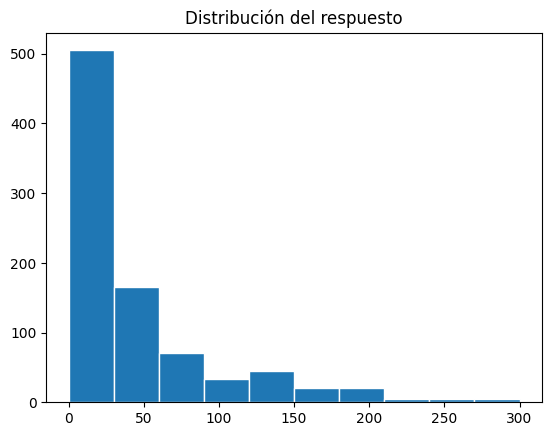

In [18]:
# Histotrama
plt.hist(movies['budget'], bins=10, edgecolor='white')
plt.title('Distribución del respuesto')
plt.show()

### Ingreso local y mundial

Ahora desarrolle la distribución de frecuencia y histograma para las variables ingreso local (box_dom) e ingreso mundial (box_world).

In [ ]:
# Distribución de frecuencia ingreso local


In [ ]:
# Histograma ingreso local


In [ ]:
# Distribución de frecuencia ingreso mundia


In [ ]:
# Histograma ingreso mundial


## Estadísticas descriptivas

### Resumen general de las variables numéricas

Aplicando la función `describe()` a las variables numéricas se puede generar un resumen estadístico con las principales medidas para variables numéricas.

In [19]:
# Resumen estadístico de las columnas numéricas
movies[['budget','box_dom','box_world']].describe()

,budget,box_dom,box_world
count,873.000000,873.000000,873.000000
mean,44.446338,57.448418,143.170251
std,54.005903,84.265678,235.686308
min,0.003967,0.000000,0.000000
25%,8.000000,4.231500,10.106975
50%,25.000000,30.542576,56.238045
75%,58.000000,72.688614,160.903019
max,300.000000,928.788515,2050.788515


Tambien se pueden calcular las estadísticas de forma individual aplicando funciones a las columnas de interes.

In [20]:
# Media
movies['budget'].mean()

44.44633787743414

In [21]:
# Mediana
movies['budget'].median()

25.0

In [22]:
# Moda
movies['budget'].mode()

0    40.0
Name: budget, dtype: float64

In [23]:
# Varianza
movies['budget'].var()

2916.6375758285676

In [24]:
# Desviación estandar
movies['budget'].std()

54.00590315723428

In [25]:
# Rango
movies['budget'].max() - movies['budget'].min()

299.996033

In [26]:
# Coeficiente de variación
(movies['budget'].std()/abs(movies['budget'].mean()))*100

121.50810558602541

In [27]:
# Coeficiente de asimetria
movies['budget'].skew()

1.88647826624673

In [28]:
# Curtosis
movies['budget'].kurt()

3.3780346028665864

In [29]:
# Cuartiles
movies['budget'].quantile([0.25,0.50,0.75])

0.25     8.0
0.50    25.0
0.75    58.0
Name: budget, dtype: float64

In [30]:
# Deciles
movies['budget'].quantile(np.arange(0.1, 1, 0.1))

0.1      1.5
0.2      5.0
0.3     10.0
0.4     17.0
0.5     25.0
0.6     35.0
0.7     45.4
0.8     70.0
0.9    130.0
Name: budget, dtype: float64

## Análisis bivariado

Cuando se quiere analizar la relación entre dos variables se pueden utilizar los siguientes enfoques:

- Variable Categórica vs Variable Categórica: tablas cruzadas y gráficos de barras agrupados
- Variable Categórica vs Variable Numérica: estadísticas agrupadas y gráficos de barra
- Variable Numéricas vs Variable Numérica: gráficos de dispersión y análisis de correlación.



### Tablas cruzadas

Para generar una tabla vamos a utilizar la función `pivot_table()` de pandas. Suponga que queremos ver que clasificación de peliculas es mas frecuente de acuerdo a los generos. Por tanto, vamos a generar un tabla cruzada entre las variables *genre* y *mppa*.

In [43]:
# tabla cruzada genero y clasificación
tab_cruzada_genre_mpaa = movies.pivot_table(index='genre', columns='mpaa', values='budget', aggfunc='count', fill_value=0)
tab_cruzada_genre_mpaa

mpaa,G,NC-17,Not Rated,PG,PG-13,R
genre,,,,,,
Action,0,0,2,0,61,42
Adventure,6,0,1,52,31,6
Black Comedy,0,0,1,0,5,10
Comedy,3,0,8,26,41,85
Concert/Performance,1,0,0,3,0,3
Documentary,1,0,15,2,4,0
Drama,1,1,17,24,96,100
Horror,0,0,2,1,16,35
Musical,0,0,1,3,4,1


La función `pivot_table()` se utiliza para crear una tabla dinámica (pivot table) que resume y reorganiza los datos de un DataFrame según ciertas categorías o variables. Veamos en detalle cada uno de los argumentos de esta función:

- `index='genre'`: Aquí se especifica la columna 'genre' como el índice de la tabla dinámica. En otras palabras, la tabla resultante tendrá filas correspondientes a cada valor único presente en la columna 'genre'.

- `columns='mpaa'`: Se define la columna 'mpaa' como las columnas de la tabla dinámica. Cada valor único presente en la columna 'mpaa' se convertirá en una columna en la tabla resultante.

- `values='budget'`: Indica la columna 'budget' como la que se utilizará para calcular los valores en la tabla dinámica. En este caso, se contará la cantidad de ocurrencias del valor 'budget' para cada combinación de género ('genre') y clasificación MPAA ('mpaa').

- `aggfunc='count'`: Especifica la función de agregación que se utilizará para calcular los valores de la tabla dinámica. En este caso, se utiliza 'count', lo que significa que se contará el número de ocurrencias para cada combinación de género y clasificación MPAA.

- `fill_value=0`: Permite especificar un valor para llenar los espacios vacíos (NaN) en la tabla dinámica. En este caso, se establece como 0.

En resumen, esta línea de código está creando una tabla dinámica que muestra la cantidad de películas ('budget') en función del género ('genre') y la clasificación MPAA ('mpaa'). Cada fila representa un género y cada columna representa una clasificación MPAA, y los valores dentro de la tabla muestran la cantidad de películas que cumplen con esa combinación de género y clasificación MPAA.

<Axes: ylabel='genre'>

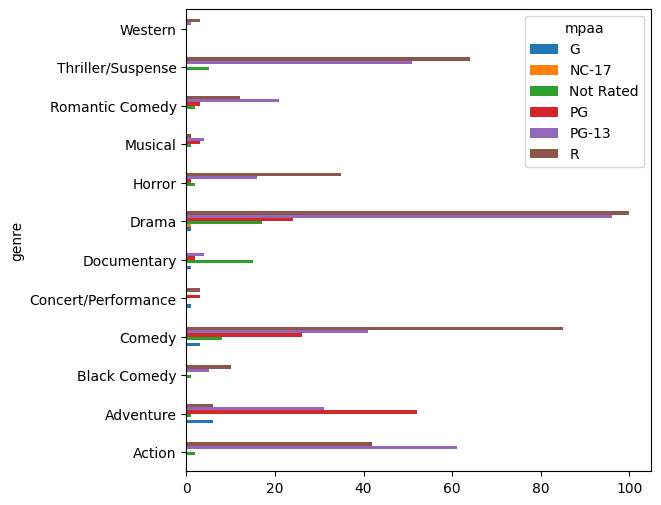

In [46]:
# Generar una
tab_cruzada_genre_mpaa.plot.barh(figsize=(6,6))

A continuación, se muestra cómo calcular el porcentaje del total por fila, esto es el porcentaje que representa cada clasificación dentro de cada genero.

In [50]:
# Calcular el porcentaje por fila
tab_cruzada_porc_genre_mpaa = tab_cruzada_genre_mpaa.apply(lambda row: (row / row.sum()) * 100, axis=1)
tab_cruzada_porc_genre_mpaa

mpaa,G,NC-17,Not Rated,PG,PG-13,R
genre,,,,,,
Action,0.000000,0.00000,1.904762,0.000000,58.095238,40.000000
Adventure,6.250000,0.00000,1.041667,54.166667,32.291667,6.250000
Black Comedy,0.000000,0.00000,6.250000,0.000000,31.250000,62.500000
Comedy,1.840491,0.00000,4.907975,15.950920,25.153374,52.147239
Concert/Performance,14.285714,0.00000,0.000000,42.857143,0.000000,42.857143
Documentary,4.545455,0.00000,68.181818,9.090909,18.181818,0.000000
Drama,0.418410,0.41841,7.112971,10.041841,40.167364,41.841004
Horror,0.000000,0.00000,3.703704,1.851852,29.629630,64.814815
Musical,0.000000,0.00000,11.111111,33.333333,44.444444,11.111111


Esta función toma una fila de la tabla cruzada como entrada `(row)`. Luego, divide cada valor de la fila por la suma de todos los valores de esa fila `(row.sum())`, y finalmente, multiplica cada valor resultante por 100 para obtener el porcentaje correspondiente.

La opción `axis=1` en la función `apply()` se utiliza para aplicar la función a cada fila. Esto significa que el cálculo se realiza en el sentido horizontal, por lo que el porcentaje se calcula para cada combinación de género y clasificación MPAA.

Después de aplicar la función lambda a cada fila, se obtiene una nueva tabla con los porcentajes en lugar de los valores originales. Esta nueva tabla se almacena en la variable tab_cruzada_porc_genre_mpaa.

Haga un análisis basado en tablas cruzadas que permita identificar la relación entre el mes de lanzamiento y el genero. Genero una **gráfico** de serie de tiempo.

In [ ]:
# Tabla cruzada mes vs genero


In [ ]:
# Gráfico de serie de tiempo mes vs cantidad de películas por genero


### Estadísticas agrupadas

Las estadísticas agrupadas, también conocidas como datos agrupados o tabulados, son una técnica utilizada en estadística para resumir y analizar grandes conjuntos de datos numéricos al agrupar los valores en intervalos o categorías más amplias. En lugar de analizar cada valor individualmente, se resumen los datos en grupos para obtener una visión más general y simplificada del comportamiento de la variable, ejemplo:

- Ingresos totales por genero
- Ingresos medios por genero
- Presupuesto mínimo por genero
- Ingresos totales por año


In [66]:
# Calcula ingreso local y mundial por genero
ingresos_total_genero = movies.pivot_table(index='genre', values=['box_dom','box_world'], aggfunc='sum', fill_value=0)
ingresos_total_genero

,box_dom,box_world
genre,,
Action,10705.500600,32248.085135
Adventure,13185.270269,37898.912589
Black Comedy,553.667504,1219.490687
Comedy,9040.238002,18073.637990
Concert/Performance,182.446207,266.861345
Documentary,47.583893,52.202827
Drama,7236.371037,14845.339734
Horror,1677.294284,3668.190408
Musical,491.364457,958.261297


In [71]:
# Calcula el ingreso total y lo organiza
ingresos_total_genero['box_total'] = ingresos_total_genero.sum(axis=1)
ingresos_total_genero = ingresos_total_genero.sort_values(by='box_total', ascending=False)
ingresos_total_genero

,box_dom,box_world,box_total
genre,,,
Adventure,13185.270269,37898.912589,51084.182858
Action,10705.500600,32248.085135,42953.585735
Comedy,9040.238002,18073.637990,27113.875992
Drama,7236.371037,14845.339734,22081.710771
Thriller/Suspense,5376.472281,12077.183003,17453.655284
Horror,1677.294284,3668.190408,5345.484692
Romantic Comedy,1348.121899,2823.898717,4172.020616
Black Comedy,553.667504,1219.490687,1773.158191
Musical,491.364457,958.261297,1449.625754


<Axes: ylabel='genre'>

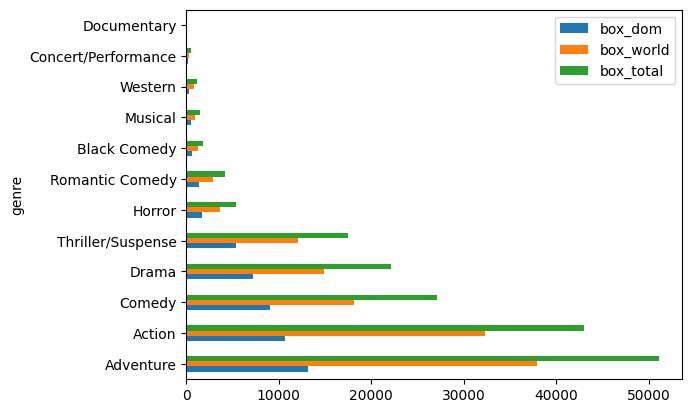

In [72]:
ingresos_total_genero.plot.barh()

In [68]:
# Calcula ingreso medio por pelicula a nivel local y mundial por genero
ingresos_medio_genero = movies.pivot_table(index='genre', values=['box_dom','box_world'], aggfunc='mean', fill_value=0)
ingresos_medio_genero.sort_values(by='box_dom', ascending=False)

,box_dom,box_world
genre,,
Adventure,137.346565,394.780339
Action,101.957149,307.124620
Western,77.034601,213.891341
Comedy,55.461583,110.881215
Musical,54.596051,106.473477
Thriller/Suspense,44.803936,100.643192
Romantic Comedy,35.476892,74.313124
Black Comedy,34.604219,76.218168
Horror,31.061005,67.929452


Haga un análisis de ingresos totales e ingresos medios por mes ¿Cuál es el mes con mejores ingresos?

In [ ]:
# Ingresos totales por mes


In [ ]:
# Ingresos medios por mes


### Gráficos de dispersión y análisis de correlación para las peliculas

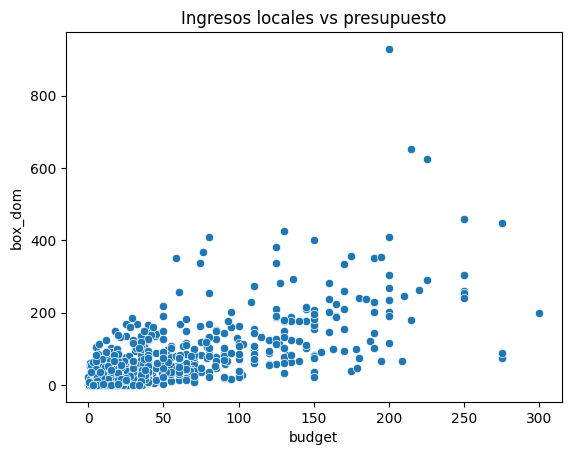

In [75]:
# Gráfico de dispersión presupuesto vs ingreso local
sns.scatterplot(data=movies, x='budget', y='box_dom')
plt.title('Ingresos locales vs presupuesto')
plt.show()

<Axes: xlabel='budget', ylabel='box_world'>

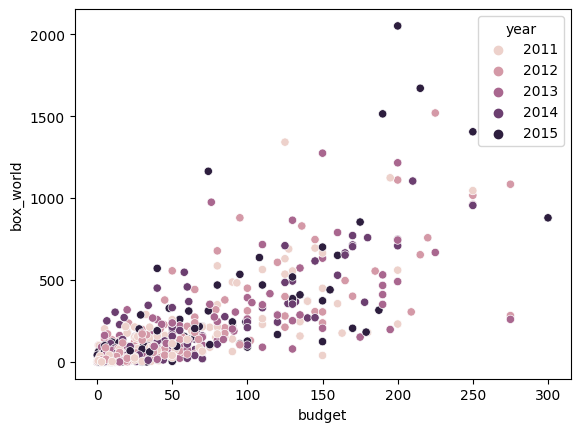

In [78]:
# Dar color a los puntos en función de una variable categórica
sns.scatterplot(data=movies, x='budget', y='box_world', hue='year')

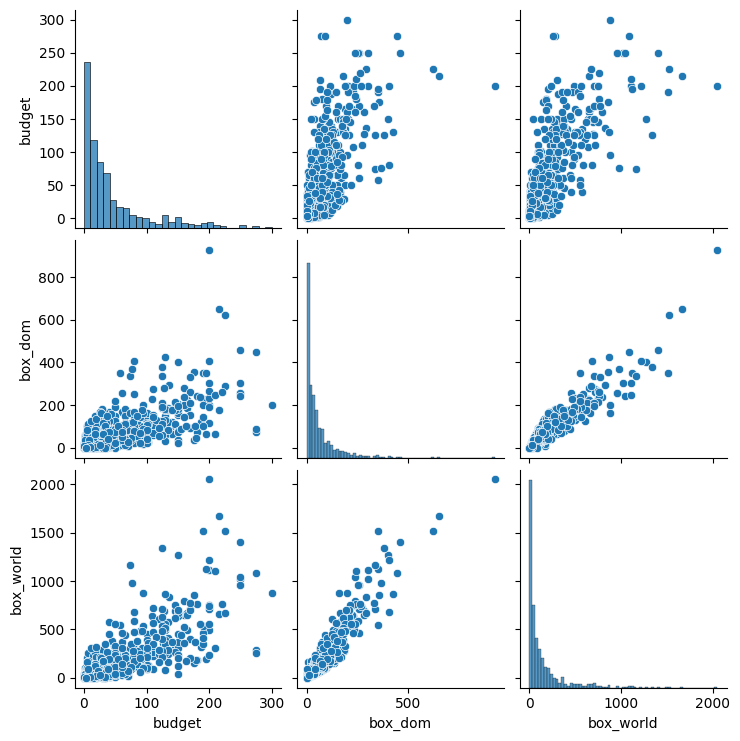

In [79]:
# Gráficos de dispersión entre variables numéricas e histogramas
sns.pairplot(movies[['budget','box_dom','box_world']])

In [ ]:
# Calculo de correlación entre variables
movies[['budget','box_dom','box_world']].corr()

,budget,box_dom,box_world
budget,1.000000,0.715714,0.786801
box_dom,0.715714,1.000000,0.946223
box_world,0.786801,0.946223,1.000000


## Gráficos de cajas

<Axes: xlabel='box_dom'>

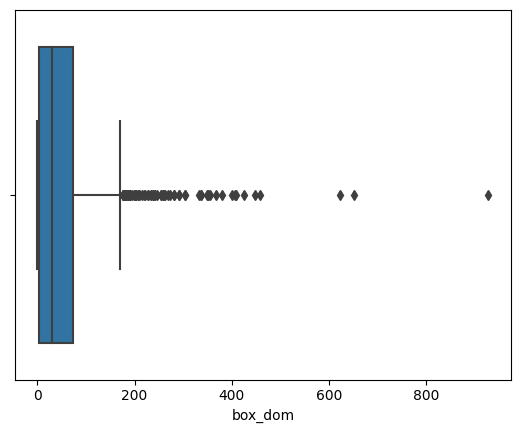

In [82]:
# Gráfico de caja para una variable
sns.boxplot(data=movies, x='box_dom')

<AxesSubplot:xlabel='box_dom', ylabel='genre'>

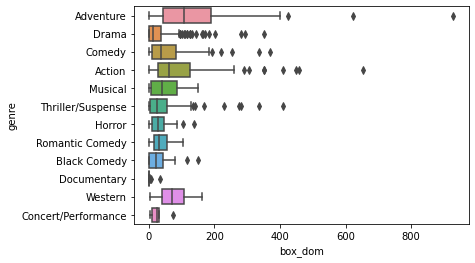

In [ ]:
# Comparar ingresos de peliculas por genero a través de gráficos de caja
sns.boxplot(data=movies, x='box_dom', y='genre', orient='h')

In [ ]:
# Genere un gráfico de caja para comparar los presupuestos de las peliculas por genero


In [ ]:
# Genere un gráfico de caja para comparar los presupuestos de las peliculas por clasificación


## Manipulación de tablas

### Creación de una nueva columna

In [85]:
# Crea una columna en la tabla original para ingreso total
movies["box_total"] = movies["box_dom"] + movies["box_world"]

# Crear una columna en la tabla original para la ganancia (profit)
movies["profit"] = movies["box_total"] - movies["budget"]
movies

,movie,budget,box_dom,box_world,distributor,genre,mpaa,month,day,year,rango_budget,box_total,profit
0,The Legend of Hercules,70.0,18.848538,61.402445,Lionsgate,Adventure,PG-13,1,10,2014,"(60.003, 90.003]",80.250983,10.250983
1,Gangster Squad,60.0,46.000903,104.100903,Warner Bros.,Drama,R,1,11,2013,"(30.004, 60.003]",150.101806,90.101806
2,Quartet,11.0,18.388357,56.178935,Weinstein Co.,Comedy,PG-13,1,11,2013,"(-0.296, 30.004]",74.567292,63.567292
3,A Haunted House,2.5,40.041683,59.922558,Open Road,Comedy,R,1,11,2013,"(-0.296, 30.004]",99.964241,97.464241
4,Contraband,25.0,66.528000,98.406855,Universal,Action,R,1,13,2012,"(-0.296, 30.004]",164.934855,139.934855
...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,Bucky Larson: Born to Be a Star,10.0,2.529395,2.529395,Sony Pictures,Comedy,R,9,9,2011,"(-0.296, 30.004]",5.058790,-4.941210
869,Creature,3.0,0.327000,0.327000,The Bubble Factory,Horror,R,9,9,2011,"(-0.296, 30.004]",0.654000,-2.346000
870,Tanner Hall,3.0,0.005073,0.005073,Anchor Bay Entertainment,Drama,R,9,9,2011,"(-0.296, 30.004]",0.010146,-2.989854
871,Warrior,25.0,13.657115,24.215385,Lionsgate,Drama,PG-13,9,9,2011,"(-0.296, 30.004]",37.872500,12.872500


<Axes: xlabel='profit', ylabel='genre'>

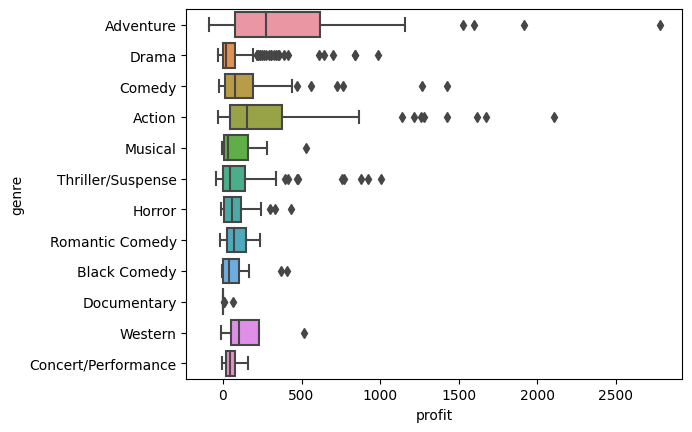

In [86]:
sns.boxplot(data=movies, x='profit', y='genre')

### Filtrado

In [ ]:
# Filtrar películas con peridas (ganancia negativa)
movies.loc[movies["profit"] < 0]

,movie,budget,box_dom,box_world,distributor,genre,mpaa,month,day,year,box_total,profit
7,The Divide,3.0,0.018000,0.138274,Anchor Bay Entertainment,Thriller/Suspense,R,1,13,2012,0.156274,-2.843726
9,Down for Life,3.8,0.041914,0.041914,B.D. Fox Independent,Drama,R,1,14,2011,0.083828,-3.716172
12,Blackhat,70.0,7.889395,19.535476,Universal,Thriller/Suspense,R,1,16,2015,27.424871,-42.575129
26,R100,5.5,0.024956,0.024956,Drafthouse Films,Black Comedy,Not Rated,1,23,2015,0.049912,-5.450088
27,Song One,6.0,0.032251,0.032251,Cinedigm/Film Arcade,Drama,PG-13,1,23,2015,0.064502,-5.935498
...,...,...,...,...,...,...,...,...,...,...,...,...
860,Thunder and the House of Magic,34.0,0.004091,10.391684,Shout! Factory,Adventure,Not Rated,9,5,2014,10.395775,-23.604225
862,Winnie Mandela,15.0,0.061847,0.061847,Image Entertainment,Drama,R,9,6,2013,0.123694,-14.876306
868,Bucky Larson: Born to Be a Star,10.0,2.529395,2.529395,Sony Pictures,Comedy,R,9,9,2011,5.058790,-4.941210
869,Creature,3.0,0.327000,0.327000,The Bubble Factory,Horror,R,9,9,2011,0.654000,-2.346000


In [87]:
# Hacer tablas de frecuencia con este filtro
movies.loc[movies["profit"] < 0].groupby("genre").size().sort_values()

genre
Concert/Performance     1
Western                 1
Musical                 2
Romantic Comedy         4
Black Comedy            5
Horror                  7
Action                 10
Adventure              10
Documentary            16
Comedy                 25
Thriller/Suspense      26
Drama                  72
dtype: int64